Proposal: 1 Smile Automated Rating System

#### Problem statement: 

Customer feedback has many functions, it provides an insight into what is working well about a product or service, consumer expectations and what should be done to make the consumer experience better. It lets the consumer feel important and involved, it generates reccommendations on products that might lead buyer's confidence and more sales.

There are many reasons why consumers don't leave feedbacks, reasons range from inconvenience, to preference, to error in feedback links. We know some companies go as far as to reward consumers for giving feedback but this can be a costly process. 

In an local context, we find that the Apple App store's Singapore offerings (local apps) has a disproportionate ratio of users and ratings. Often, ratings are not provided even for most used apps. We find that in Asia, not only is there is a prevelant culture of avoiding honest feedbacks to preserve relationships and harmony, many ratings and reviews process also involve a multi-step review process, working against the consumer's patience. 

To encourage consumers to submit their ratings I will build an image classification model to predict the sentiments from faces, effectively reducing the rating process to a 1-step and fun process. 

My model performance will be guided by Accuracy, and the model should at least improve upon baseline by 10%. The baseline is defined as 50% based the ratio 1:1 of smiling and non-smiling labels from our target images. 

#### Data: 
4000 images from GENKI 4K dataset with expression (smile=1, non-smile=0) labels and pose labels (yaw, pitch, and roll in radians).

The file "labels.csv" contains 400 rows with labels, and the Nth line of the file corresponds to N in the "files" directory.


#### Expected Methods/Models: CNN, Keras, Opencv

#### Risk / Assumptions: 

Because this has not be touched on in class, I am still in the process of doing outside learning on CNN and keras and opencv. 

If I want to extend the the ratings to detect a range of sentiments i will have to source out another dataset. (i.e 1 -5 stars)

potential datasets:
1. Cohn-Kanade (CK and CK+) database - broken links, can't find the form to fill
2. AffectNet - waiting for request approval for download
3. Radboud Faces Database - waiting for request approval for download
4. KDEF - approved and downloaded

#### Initial EDA:

GENKI 4K
- labels.csv - has labeled smiles or non smiles for all 4000 images
- images - initial look shows images of colour, with various shapes

KDEF:
- labels are incorporated in image name
- 123 folders with 35 pictures inside (including pictures with side profiles). total:4305
- 7 Expressions (to be reduced to min=3, max=5, drop 'afraid' and 'surprised')
- dimensions of .jpg 562 x 762 RGB 
- if drop side profiles, surprised, afraid. total pictures = 1845 pictures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data, color
from skimage.feature import Cascade
from matplotlib.patches import Rectangle

In [2]:
labels = pd.read_csv('../datasets/labels.csv', names= ['smile', 'yaw', 'pitch', 'row'])

In [3]:
print(labels.shape)
labels.head()

(4000, 4)


,smile,yaw,pitch,row
0,1,-0.021162,0.059530,-0.039662
1,1,-0.057745,0.083098,-0.094952
2,1,0.095993,0.028798,0.065996
3,1,0.000000,0.047124,0.171268
4,1,0.036073,0.043633,-0.181721


In [4]:
labels.tail()

,smile,yaw,pitch,row
3995,0,0.396190,0.054105,0.078519
3996,0,-0.020944,-0.008727,0.099669
3997,0,0.693178,0.079642,0.021657
3998,0,0.267035,0.059341,-0.041350
3999,0,-0.123615,0.274017,0.058756


In [5]:
#load trained file
trained_file = data.lbp_frontal_face_cascade_filename()

#initialise the detector cascade
detector = Cascade(trained_file)

In [6]:
def show_face(image, image_num):
    """find faces in images"""
    # Apple detector on image
    detected = detector.detect_multi_scale(img = image,
                                          scale_factor= 1.2,
                                          step_ratio= 1,
                                          min_size = (10,10),
                                          max_size = (200,200))
    
    plt.imshow(image)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(image_num)
    plt.axis ('off')
    
    for patch in detected:
        img_desc.add_patch(Rectangle((patch['c'], patch['r']),
                                             patch['width'], patch['height'],
                                             fill=False, color = 'r', linewidth=2))
    plt.show()

(192, 178, 3)


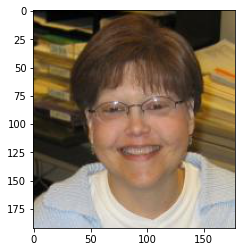

In [7]:
img1 = plt.imread('../datasets/sample/file0001.jpg')
plt.imshow(img1)
print(img1.shape)


(192, 179, 3)


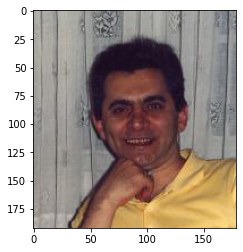

In [8]:
img2 = plt.imread('../datasets/sample/file0002.jpg')
plt.imshow(img2)
print(img2.shape)

(262, 350, 3)


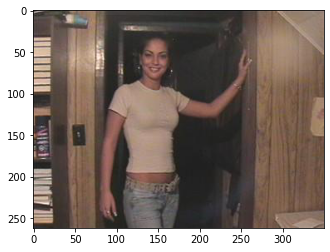

In [9]:
img3 = plt.imread('../datasets/sample/file0003.jpg')
plt.imshow(img3)
print(img3.shape)

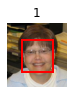

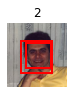

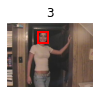

In [10]:
# show face detection
plt.figure(1)
plt.subplot(311)
show_face(img1, '1')

plt.subplot(312)
show_face(img2, '2')

plt.subplot(313)
show_face(img3, '3')

## check img2, double capture

Resources:

Machine Perception Laboratory,
University of California, San Diego "http://mplab.ucsd.edu, The MPLab GENKI-4K Dataset."

E.Lundqvist, D., Flykt, A., & Öhman, A. (1998). The Karolinska Directed Emotional Faces - KDEF, CD ROM from Department of Clinical Neuroscience, Psychology section, Karolinska Institutet, ISBN 91-630-7164-9.

"Challenges in Representation Learning: A report on three machine learning
contests." I Goodfellow, D Erhan, PL Carrier, A Courville, M Mirza, B
Hamner, W Cukierski, Y Tang, DH Lee, Y Zhou, C Ramaiah, F Feng, R Li,
X Wang, D Athanasakis, J Shawe-Taylor, M Milakov, J Park, R Ionescu,
M Popescu, C Grozea, J Bergstra, J Xie, L Romaszko, B Xu, Z Chuang, and
Y. Bengio. arXiv 2013.- https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

https://github.com/code-by-dt/emotion_detection

KDEF sample folder:

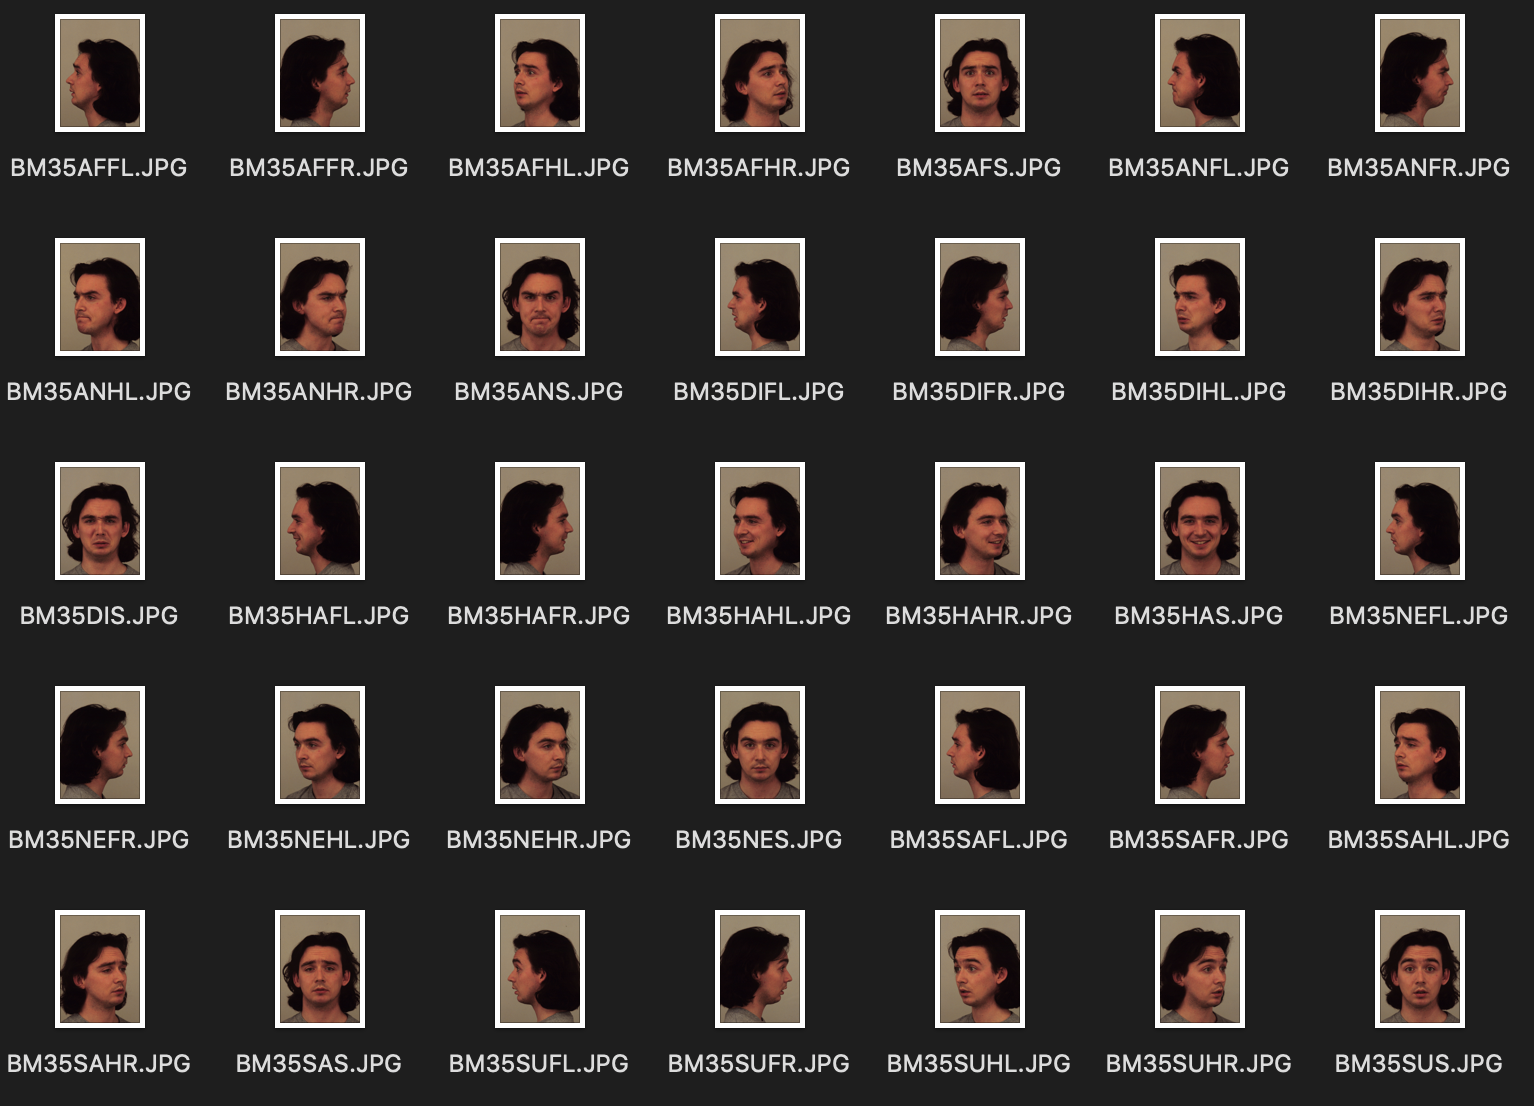

KDEF codes:

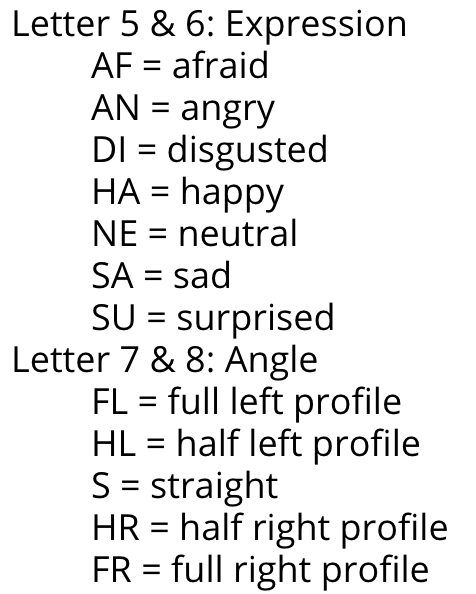


In [ ]:
# cv2.imshow('output', img2)
# cv2.waitKey(0)

In [11]:
#capture webcam
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

while True:
    success, img = cap.read()
    cv2.imshow("Video", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break